# Tutorial 8: Deep Learning
### March 2, 2023

### Solving logistic regression using backpropagation

In [1]:
## Importing libraries
import numpy as np
from numpy import random
import numpy.matlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from decimal import *

Text(0.5, 1.0, 'classes of apples (training data)')

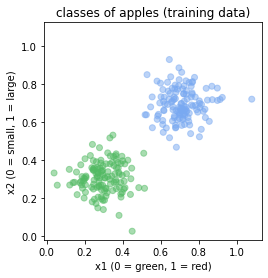

In [15]:
## Defining a function that generates data for 2 classes (inputs x and desired outputs f(x))
def generate_data(means, sigma, ndatapoints):
    nclasses = 2
    inputs = np.zeros((nclasses * ndatapoints, 2)) # input examples (apples)
    labels = np.zeros((nclasses * ndatapoints, 1)) # desired outputs
    colors = np.zeros((nclasses * ndatapoints, 3)) # class colours 
    for c in range(0, nclasses):
        starti = c * ndatapoints
        endi = (c + 1) * ndatapoints
        inputs[starti:endi, :] = means[c] + sigma * random.standard_normal((ndatapoints, 2))
        labels[starti:endi, :] = c
        colors[starti:endi, :] = np.matlib.repmat(np.random.rand(1,3),ndatapoints,1)

    randvec = np.random.permutation(nclasses * ndatapoints) # randomize order of input examples
    inputs = inputs[randvec,:]
    labels = labels[randvec,:]
    colors = colors[randvec,:] 
    return inputs, labels, colors; 

## Setting parameters and generating training data   
means = (0.3, 0.7)
sigma = 0.09
ndatapoints = 128 # generating 128 training examples
[inputs, labels, colors] = generate_data(means, sigma, ndatapoints)

# Showing generated data
figi = 1; plt.figure(figi); plt.clf()
plt.scatter(inputs[:,0], inputs[:,1], c=colors, alpha=0.5)
plt.axis('square')  
plt.xlabel('x1 (0 = green, 1 = red)')
plt.ylabel('x2 (0 = small, 1 = large)')
plt.title('classes of apples (training data)')

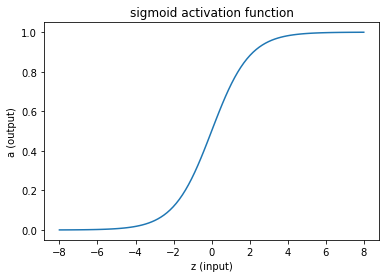

In [16]:
## Next, we define our activation function and initialize the weights. For logistic regression, we initialize all 
## weights to zero. Next week, we will discuss how to initialize weights for larger neural networks.

## Defining the sigmoid activation function
def sigmoid(z):
    a = 1 / (1 + np.exp(-z))    
    return a
    
## Showing the sigmoid function 
z = np.linspace(-8, 8, 100)
a = sigmoid(z)
plt.figure(2)
plt.clf()
plt.plot(z, a)
plt.xlabel('z (input)')
plt.ylabel('a (output)')
plt.title('sigmoid activation function')

## Initializing the weights
def initialize_weights(nweights, randn):
    if randn == 0:
        w = np.zeros( (nweights, 1) )       
    else:
        w = 0.001 * random.standard_normal( (nweights, 1) )
    b = 0
    return w, b

nweights = 2
randn = 0    
w, b = initialize_weights(nweights, randn)

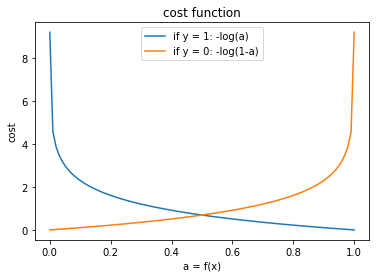

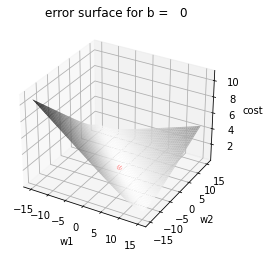

In [17]:
## Let's now propagate activation forward, i.e. compute f(x) for our training data X using the initialized weights. 
## We will also compute the cost, i.e. the average loss across training examples. We use the negative log-likelihood 
## for logistic regression as our loss function. This function is also known as the binary cross-entropy loss function.

## Propagate forward    
def forward(X, w, b): 
    z = np.dot(np.transpose(w), X) + b
    a = sigmoid(z)
    return a

X = np.transpose(inputs)
a = forward(X, w, b)

## Computing the cost
def compute_cost(a, y):
    m = a.shape[1]
    cost =  -(1 / m) * np.sum(y * np.log(a) + (1 - y) * np.log(1 - a))
    return cost
 
y = np.transpose(labels)  
cost = compute_cost(a, y) 
 
## Showing cost function
a_ls = np.linspace(0.0001, 0.9999, 100)
cost_y1 = - np.log(a_ls)
cost_y0 = - np.log(1 - a_ls)
plt.figure(3)
plt.clf()
plt.plot(a_ls, cost_y1)
plt.plot(a_ls, cost_y0)
plt.legend( ('if y = 1: -log(a)', 'if y = 0: -log(1-a)') )
plt.xlabel('a = f(x)')
plt.ylabel('cost')
plt.title('cost function')

## Showing error surface
def error_surface(b, w, cost, figi):
    # plot error surface across w1 and w2 for a user-identified value of b (input arg b)
    w1 = np.linspace(-15, 15, 100)
    w2 = np.linspace(-15, 15, 100)
    xx, yy = np.meshgrid(w1, w2)
    costs = np.zeros( (w1.shape[0], w2.shape[0]) )
    for r in range(w1.shape[0]):
        for c in range(w2.shape[0]):
            cw = np.zeros( (nweights, 1) )
            cw[0] = xx[r,c]
            cw[1] = yy[r,c]
            ca = forward(X, cw, b)
            ccost = compute_cost(ca, y)
            costs[r,c] = ccost
    plt.figure(figi)
    plt.clf()
    ax = plt.axes(projection = '3d')
    ax.plot_surface(xx, yy, costs, cmap = 'binary', edgecolor = 'none')
    ax.scatter(w[0], w[1], cost, c = 'r') # plot cost for current weights (input args b and w) 
    
    # add figure labels
    width = 3
    precision = 3
    value = Decimal(b)
    title = f"error surface for b = {value:{width}.{precision}}"
    ax.set_title(title)
    ax.set_xlabel('w1')
    ax.set_ylabel('w2')
    ax.set_zlabel('cost')
    plt.show()
    plt.pause(0.004)
    
    return xx, yy, costs 

xx, yy, costs = error_surface(b, w, cost, 4)

In [20]:
## The next step is backpropagation. We will compute the error derivatives of the cost function J with respect to 
## weights x and and bias term b

# Propagate back  
def back(a, y, X):  
    m = a.shape[1]     
    dw = (1 / m) * np.dot(X, np.transpose(a - y))
    db = (1 / m) * np.sum(a - y)
    return dw, db
    
dw, db = back(a, y, X)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.332590
Cost after iteration 200: 0.215386
Cost after iteration 300: 0.160274
Cost after iteration 400: 0.128552
Cost after iteration 500: 0.107944
Cost after iteration 600: 0.093458
Cost after iteration 700: 0.082696
Cost after iteration 800: 0.074372
Cost after iteration 900: 0.067729
Cost after iteration 1000: 0.062297
Cost after iteration 1100: 0.057766
Cost after iteration 1200: 0.053926
Cost after iteration 1300: 0.050625
Cost after iteration 1400: 0.047756
Cost after iteration 1500: 0.045237
Cost after iteration 1600: 0.043005
Cost after iteration 1700: 0.041013
Cost after iteration 1800: 0.039224
Cost after iteration 1900: 0.037606


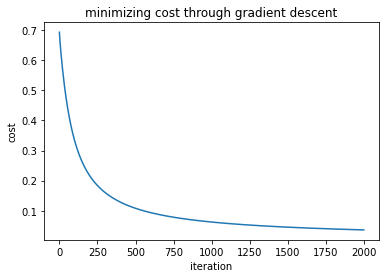

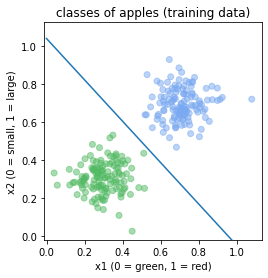

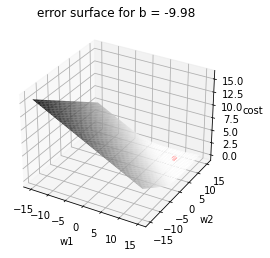

In [23]:
## Now we can optimize the weights using gradient descent. The error gradients tell us in which direction and how much to 
## adjust the weights to reduce the cost. We iteratively adjust the weights until convergence on a global or local minimum. 
## If the cost function is convex, as for logistic regression, we will converge on a global minimum independent of where we 
## start in weight space.

## PLotting the decision boundary (as in tutorial 2)
def plot_boundary(weights, figi):
    b = weights['b']
    w = weights['w']    
    slope = -(b / w[1]) / (b / w[0])
    y_intercept = -b / w[1]
    x = np.linspace(0,1,100)
    y = (slope * x) + y_intercept
    plt.figure(figi)
    plt.plot(x, y)
    plt.pause(0.004)

## Optimizing the weights using gradient descent
def optimize(w, b, X, y, niterations, alpha, monitor):
  
    costs = []
    
    for i in range(niterations):
        a = forward(X, w, b)
        cost = compute_cost(a, y)
        dw, db = back(a, y, X)
        
        w = w - alpha * dw
        b = b - alpha * db
        costs.append(cost)    

    # print cost and show error surface (incl. cost) for every 100 iterations
        if monitor and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))        
                
    weights = {"w": w,
              "b": b}
              
    gradients = {"dw": dw,
                "db": db}
    
    return weights, gradients, costs            

niterations = 2000
alpha = 0.5
monitor = 1
weights, gradients, costs = optimize(w, b, X, y, niterations, alpha, monitor)

## Plotting cost as a function of iteration
plt.figure(5)
plt.clf()
plt.plot(costs)
plt.xlabel('iteration')
plt.ylabel('cost')
plt.title('minimizing cost through gradient descent')

## Showing training data and learned decision boundary
figi = 6; plt.figure(figi); plt.clf()
plt.scatter(inputs[:,0], inputs[:,1], c=colors, alpha=0.5)
plt.axis('square') 
plt.xlabel('x1 (0 = green, 1 = red)')
plt.ylabel('x2 (0 = small, 1 = large)')
plt.title('classes of apples (training data)')
plot_boundary(weights, figi)

## Plotting cost for final set of weights
[xx, yy, costs] = error_surface(weights['b'], weights['w'], cost, 7)

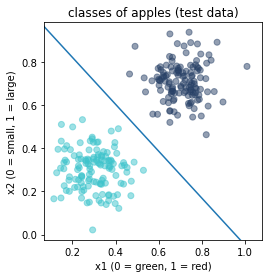

test accuracy: 100.0 %


In [42]:
## Finally, we want to test performance of our logistic regression model on new data. Let's generate test data 
## and determine how well the model performs at classifying the 'test apples' as ripe or unripe.

## generating test data   
means = (0.3,0.7)
sigma = 0.09
ndatapoints = 128
[inputs, labels, colors] = generate_data(means, sigma, ndatapoints)

## Showing generated data and learned decision boundary
figi = 8; plt.figure(figi); plt.clf()
plt.scatter(inputs[:,0], inputs[:,1], c=colors, alpha=0.5)
plt.axis('square')  
plt.xlabel('x1 (0 = green, 1 = red)')
plt.ylabel('x2 (0 = small, 1 = large)')
plt.title('classes of apples (test data)')
plot_boundary(weights, figi)

## Computing class predictions
def predict(inputs, weights):
    X = np.transpose(inputs)

    a = forward(X, weights['w'], weights['b'])
    p = np.zeros(a.shape)
    for i in range(a.shape[1]):
        if a[0,i] < 0.5:
            p[0,i] = 0
        else:
            p[0,i] = 1

    return p

y = np.transpose(labels)
p = predict(inputs, weights)
print("test accuracy: {} %".format(100 - np.mean(np.abs(p - y)) * 100))